# packages


Notably, we have first class function calls to other languages, providing excellent **foreign function interfaces**. We can easily call into python or R, for example, with PyCall or Rcall.
This means that you don't have to wait until the Julia ecosystem is fully mature, and that moving to Julia doesn't mean you have to give up your favorite package/library from another language!

In [1]:

using Pkg
Pkg.add("Example")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed Example ─ v0.5.3
    Updating `~/.julia/environments/v1.6/Project.toml`
  [7876af07] + Example v0.5.3
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [7876af07] + Example v0.5.3
Precompiling project...
  ✓ Example
  1 dependency successfully precompiled in 2 seconds (16 already precompiled)


In [2]:
using Example
hello("it's me. I was wondering if after all these years you'd like to meet.")


"Hello, it's me. I was wondering if after all these years you'd like to meet."

In [3]:
Pkg.add("Colors")

   Resolving package versions...
   Installed Reexport ────────── v1.2.2
   Installed FixedPointNumbers ─ v0.8.4
   Installed ColorTypes ──────── v0.11.4
   Installed Colors ──────────── v0.12.10
    Updating `~/.julia/environments/v1.6/Project.toml`
  [5ae59095] + Colors v0.12.10
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [3da002f7] + ColorTypes v0.11.4
  [5ae59095] + Colors v0.12.10
  [53c48c17] + FixedPointNumbers v0.8.4
  [189a3867] + Reexport v1.2.2
  [37e2e46d] + LinearAlgebra
  [2f01184e] + SparseArrays
  [10745b16] + Statistics
Precompiling project...
  ✓ Reexport
  ✓ FixedPointNumbers
  ✓ ColorTypes
  ✓ Colors
  4 dependencies successfully precompiled in 5 seconds (17 already precompiled)


In [5]:
using Colors
palette = distinguishable_colors(100)
rand(palette, 3, 3)

# plotting 
a few different ways to plot in Julia (including calling PyPlot)

**Plots.jl**: One of the advantages to Plots.jl is that it allows you to seamlessly change backends

In [1]:
#install Plots.jl packages

using Pkg
Pkg.add("Plots")
using Plots

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [2]:
x=-3:0.1:3
f=x->x^2
y=f.(x)


61-element Vector{Float64}:
 9.0
 8.41
 7.839999999999999
 7.290000000000001
 6.760000000000001
 6.25
 5.76
 5.289999999999999
 4.840000000000001
 4.41
 4.0
 3.61
 3.24
 ⋮
 3.61
 4.0
 4.41
 4.840000000000001
 5.289999999999999
 5.76
 6.25
 6.760000000000001
 7.290000000000001
 7.839999999999999
 8.41
 9.0

In [7]:
#we'll try out the gr() and plotlyjs() backends.
gr()

Plots.GRBackend()

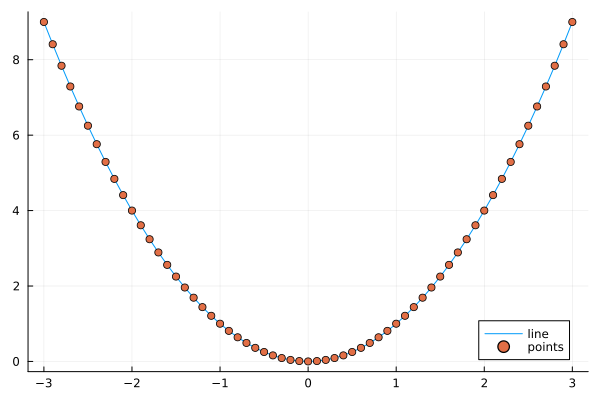

In [5]:
plot(x,y,label="line")
scatter!(x,y,label="points")

In [9]:
globaltemperatures = [14.4, 14.5, 14.8, 15.2, 15.5, 15.8]
numpirates = [45000, 20000, 15000, 5000, 400, 17]
gr()

Plots.GRBackend()

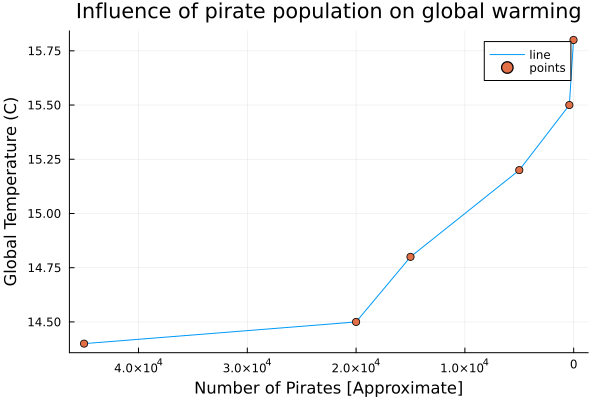

In [12]:

plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

xflip!()

In [13]:
#unicode backend
Pkg.add("UnicodePlots")
unicodeplots()

   Resolving package versions...
   Installed StaticArraysCore ─ v1.4.0
   Installed Crayons ────────── v4.1.1
   Installed MarchingCubes ──── v0.1.6
   Installed StaticArrays ───── v1.5.15
   Installed UnicodePlots ───── v3.4.0
    Updating `~/.julia/environments/v1.6/Project.toml`
  [b8865327] + UnicodePlots v3.4.0
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [299715c1] + MarchingCubes v0.1.6
  [90137ffa] + StaticArrays v1.5.15
  [1e83bf80] + StaticArraysCore v1.4.0
  [b8865327] + UnicodePlots v3.4.0
Precompiling project...
  ✓ StaticArraysCore
  ✓ Crayons
  ✓ StaticArrays
  ✓ MarchingCubes
  ✓ UnicodePlots
  5 dependencies successfully precompiled in 43 seconds (140 already precompiled)


Plots.UnicodePlotsBackend()

In [14]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

                          Influence of pirate population on global warming       
                          +----------------------------------------+       
                   15.842 | ⚬                                      | line  
                          | |                                      | points
                          | \                                      |       
                          | ⚬                                      |       
                          | |*.                                    |       
                          | | \.                                   |       
                          | |  "⚬.                                 |       
   Global Temperature (C) | |    "*.                               |       
                          | |      "*.                             |       
                          | |        "*.                           |       
                          | |          "⚬.                         |       
      

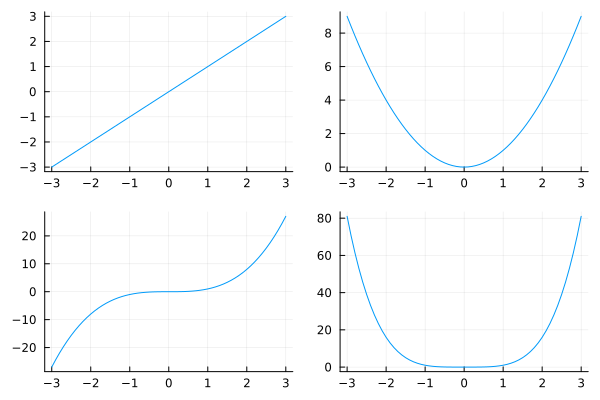

In [16]:
gr()
p1 = plot(x, x)
p2 = plot(x, x.^2)
p3 = plot(x, x.^3)
p4 = plot(x, x.^4)
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

# Multiple Dispath

* a key feature of Julia
* Multiple dispatch makes software generic and fast!
* a function with the same name has many methods; methods being excueted depends on the type of arguments
* A **generic function** is the abstract concept associated with a particular operation.
* A **method** is a specific implementation of a generic function for particular argument types.

In [17]:
methods(+)#how many methods do you think there are for addition?

# 255 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:528
[3] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:534
[4] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:383
[5] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:391
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:399
[7] +(x::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/Dates/src/periods.jl:362
[8] +(a::Union{LMS, XYZ}, b::Union{LMS, XYZ}) in Colors at /Users/jchen056/.julia/packages/Colors/mIuXl/src/algorithms.jl:4
[9] +(A::LinearAlgebra.UpperHessenberg, B::LinearAlgebra.UpperHessenberg) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/hessenberg.jl:101
[10] +(H::LinearAlgebra.UpperHessenberg, J::LinearAlgebra.UniformScaling) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/hessenberg.jl:106
[11] +(A::LinearAlgebra.UpperTriangular, B::LinearAlgebra.UpperTriangular) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/triangular.jl:648
[12] +(A::LinearAlgebra.UpperTriangular, B::LinearAlgebra.UnitUpperTriangular) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/triangular.jl:650
[13] +(A::LinearAlgebra.UpperTriangular, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:86
[14] +(a::Tuple{Vararg{Measures.Measure, N}}, b::Tuple{Vararg{Measures.Measure, N}}) where N in Measures at /Users/jchen056/.julia/packages/Measures/PKOxJ/src/point.jl:21
[15] +(a::Tuple{Vararg{Measures.Measure, N}} where N, b::Tuple{Vararg{Measures.Measure, N}} where N) in Measures at /Users/jchen056/.julia/packages/Measures/PKOxJ/src/point.jl:15
[16] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/bidiag.jl:354
[17] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UpperTriangular) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:94
[18] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UnitUpperTriangular) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:94
[19] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.LowerTriangular) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:94
[20] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UnitLowerTriangular) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:94
[21] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.Diagonal) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:115
[22] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.Tridiagonal) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:183
[23] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.SymTridiagonal) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:203
[24] +(A::LinearAlgebra.Bidiagonal{var"#s814", V} where {var"#s814"<:Number, V<:AbstractVector{var"#s814"}}, B::LinearAlgebra.UniformScaling) in LinearA

In [19]:
@which 3+4.0

+(x::Number, y::Number) in Base at promotion.jl:321

# struct



In [23]:
struct myObj
    field1
    field2
end

mutable struct Person
    name:: String
    age:: Float64
    function Person(name,age)
        new(name,ahe)
    end
end

myObj('a','b')

myObj('a', 'b')

# linear algebra

In [24]:
A=rand(1:4,3,3)

3×3 Matrix{Int64}:
 4  4  4
 3  1  3
 2  4  3

In [25]:
B=A#not creating a new matrix; simply a pointer; shared memory
C=copy(A)
[B C]

3×6 Matrix{Int64}:
 4  4  4  4  4  4
 3  1  3  3  1  3
 2  4  3  2  4  3

In [26]:
A[1]=17
[B C]# B and A share memory, C and A do not have the same memory 

3×6 Matrix{Int64}:
 17  4  4  4  4  4
  3  1  3  3  1  3
  2  4  3  2  4  3

In [31]:
x=ones(3)
#multiplication
b=A*x

#\solve Ax=b
A\b

3-element Vector{Float64}:
 1.0
 0.9999999999999999
 1.0000000000000002

In [29]:
A


3×3 Matrix{Int64}:
 17  4  4
  3  1  3
  2  4  3

LoadError: syntax: the ".'" operator is discontinued